In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Definisikan Masalah terkait bisnis yang ingin anda selesaikan (Define Business Problem):
__Masalah terkait bisnis : Mendapatkan data customer yang tidak menjadi pendapatan (revenue) di online shop__


# Definisikan Tujuan EDA anda (Define Goals), Goals harus memiliki Impact untuk perusahaan:
__Tujuan EDA : Menurunkan persentase customer yang tidak menjadi pendapatan bagi online shop dan pembuatan machine learning untuk memprediksi pelanggan yang berpotensi untuk menjadi pelanggan potensial (revenue customer) untuk meningkatkan penghasilan online shop__
__Goals EDA : Menentukan variabel yang berpengaruh untuk menentukan seorang customer merupakan pelanggan potensial atau bukan dan meningkatkan persentase pelanggan potensial sebesar kurang lebih 10%__

In [2]:
# Mengakses data
df = pd.read_csv('online_shop.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
# Pengecekan persentase data target untuk mengetahui dataset ini imbalance atau tidak
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [4]:
pd.crosstab(index = df['Revenue'], columns='count', normalize=True)

col_0,count
Revenue,
False,0.845255
True,0.154745


# Analisa Deskriptif & Handling Missing Value serta Outliers

In [5]:
# Pengecekan tabel data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# Pengecekan data kosong di tiap kolom
df.isna().sum()
# Karena tidak ada missing value maka tidak dilakukan handling missing value

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# Deskriptif Data
oshopDesc = []

for i in df.columns:
    oshopDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (((df[i]).isna().sum())/len(df)*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = oshopDesc, columns = [
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'Unique',
    'Unique Sample'
])

,Data Feature,Data Types,Null,Null Pct,Unique,Unique Sample
0,Administrative,int64,0,0.0,27,"[1, 10]"
1,Administrative_Duration,float64,0,0.0,3335,"[68.6, 113.75]"
2,Informational,int64,0,0.0,17,"[10, 13]"
3,Informational_Duration,float64,0,0.0,1258,"[53.2, 192.25]"
4,ProductRelated,int64,0,0.0,311,"[31, 486]"
5,ProductRelated_Duration,float64,0,0.0,9551,"[225.16666669999998, 347.6666667]"
6,BounceRates,float64,0,0.0,1872,"[0.012878788, 0.018814433000000002]"
7,ExitRates,float64,0,0.0,4777,"[0.006818182, 0.013546798]"
8,PageValues,float64,0,0.0,2704,"[12.63441176, 254.6071579]"
9,SpecialDay,float64,0,0.0,6,"[0.8, 0.0]"


In [8]:
# Analisis Statistik Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157213,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


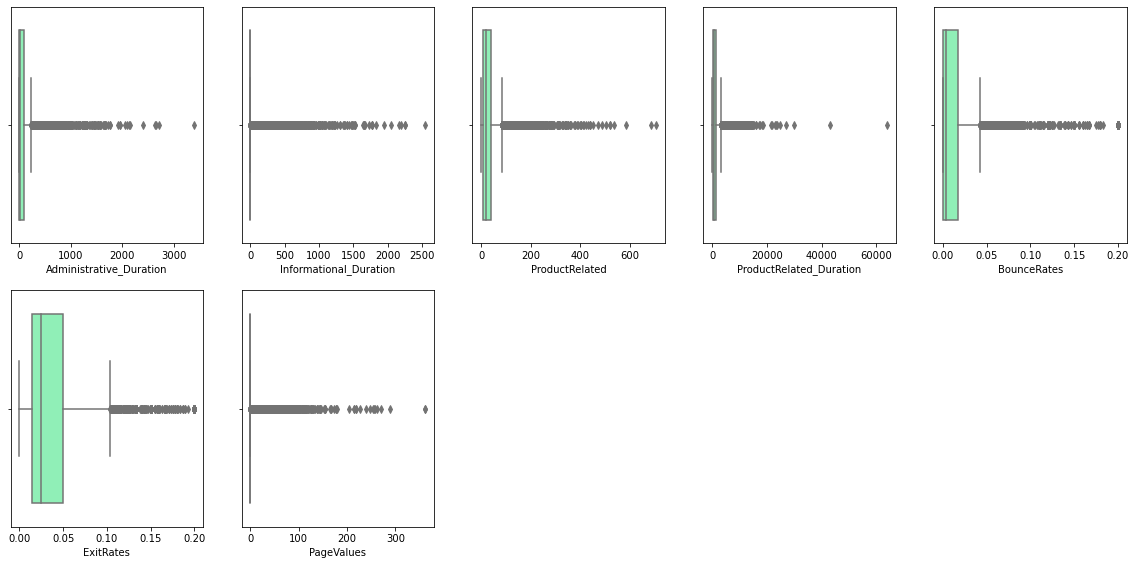

In [9]:
# Mencari Outliers dengan Boxplot
df_describe = df.drop(columns = ['Administrative', 'Informational', 'SpecialDay','Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue'])

plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,5,x)
    sns.boxplot(x=df_describe[column], palette='rainbow')
    x+=1
plt.tight_layout
plt.show()

walau data memiliki nilai outliers, namun tidak dilakukan handling karena outliers merupakan nilai variatif yang tidak mengganggu pengolahan data

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

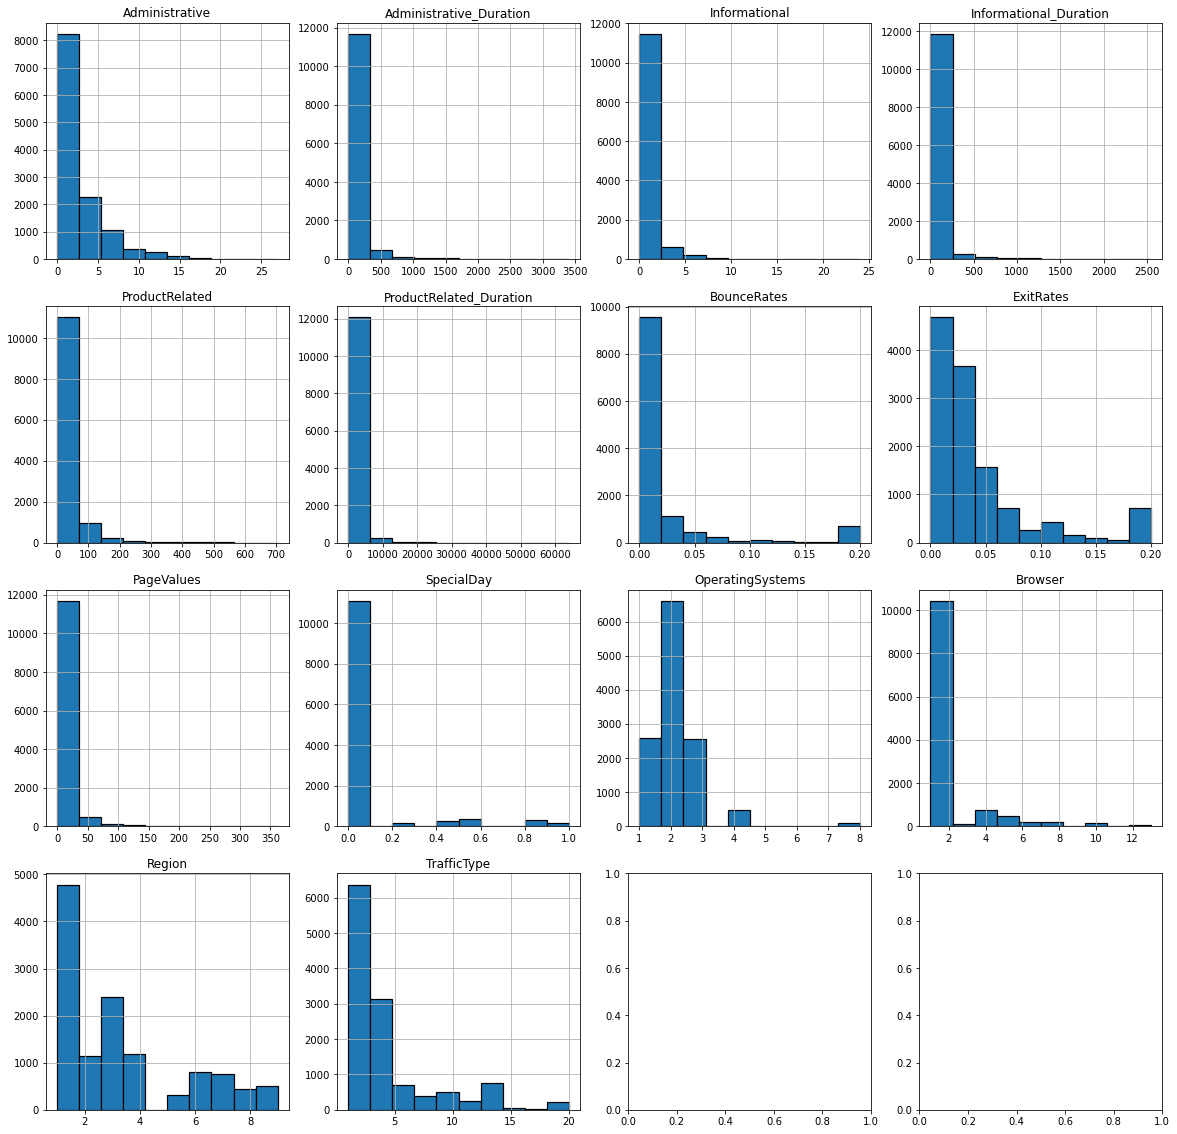

In [10]:
# Data Visualization plot histogram
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))

# Analisis Data (Multivariate, untuk mengetahui hubungan tiap kolom dengan kolom target) dan Visualisasi Data (Multivariate, Gunakan plot sesuai dengan fungsi dan tujuannya)

note : Dalam EDA kali ini hanya menggunakan analisis multivariate karena keperluan EDA ini lebih berat dalam hal Machine Learning, bukan untuk analisis mendalam dataset.

In [11]:
# Analisis Multivariate antara Revenue dan Administrative
(pd.crosstab(index = df['Revenue'], columns = df['Administrative'], normalize = 'all')*100).round(2)

Administrative,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,26,27
Revenue,,,,,,,,,,,,,,,,,,,,,
False,42.61,8.62,7.37,6.01,4.96,3.71,2.6,2.21,1.74,1.33,...,0.10,0.08,0.04,0.01,0.02,0.02,0.02,0.03,0.00,0.01
True,4.17,2.36,1.66,1.41,1.24,0.96,0.9,0.54,0.59,0.49,...,0.03,0.02,0.01,0.01,0.00,0.02,0.00,0.00,0.01,0.00


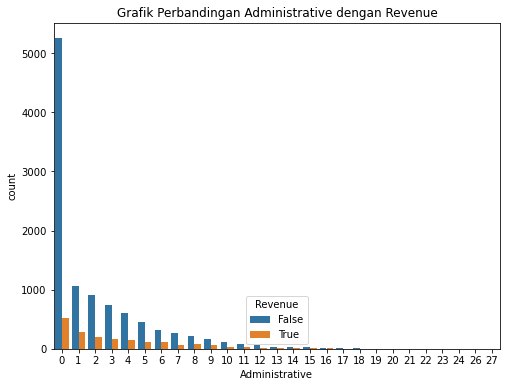

In [12]:
# Visualisasi data Analisis Multivariate antara Revenue dan Administrative
plt.figure(figsize = (8,6))
sns.countplot(x = 'Administrative', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan Administrative dengan Revenue')
plt.show()

Insight :  berdasarkan nilai administrasi, pelanggan yang berpotensi paling banyak di kelas nilai administrasi kelas 0

In [13]:
# Analisis Multivariate antara Revenue dan Administrative_Duration
(pd.crosstab(index = df['Revenue'], columns = df['Administrative_Duration'], normalize = 'all')*100).round(2)

Administrative_Duration,0.000000,1.333333,2.000000,3.000000,3.500000,4.000000,4.333333,4.500000,4.750000,5.000000,...,1951.279141,2047.234848,2086.750000,2137.112745,2156.166667,2407.423810,2629.253968,2657.318056,2720.500000,3398.750000
Revenue,,,,,,,,,,,,,,,,,,,,,
False,43.43,0.01,0.11,0.18,0.03,0.36,0.00,0.02,0.01,0.38,...,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01
True,4.44,0.00,0.02,0.03,0.00,0.09,0.01,0.00,0.00,0.05,...,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00


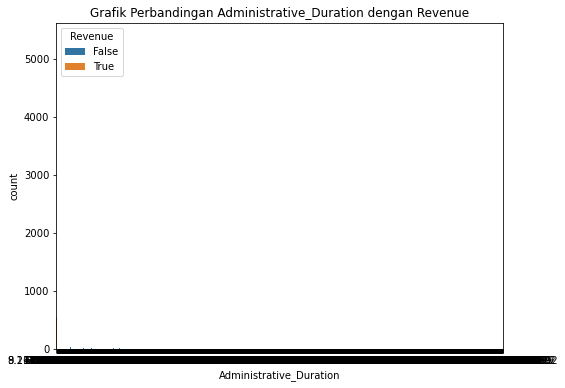

In [14]:
# Visualisasi data Analisis Multivariate antara Revenue dan Administrative_Duration
plt.figure(figsize = (8,6))
sns.countplot(x = 'Administrative_Duration', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan Administrative_Duration dengan Revenue')
plt.show()

In [15]:
df[['Administrative_Duration', 'Revenue']].groupby('Revenue').mean()

,Administrative_Duration
Revenue,
False,73.740111
True,119.483244


Insight : Durasi administrasi untuk pelanggan berpotensi rata-rata 120 detik
Mungkin dalam hal ini waktu administrasi pelanggan berpotensi lama karena mengisi data diri dengan rinci dan benar.

In [16]:
# Analisis Multivariate antara Revenue dan Informational
(pd.crosstab(index = df['Revenue'], columns = df['Informational'], normalize = 'all')*100).round(2)

Informational,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,24
Revenue,,,,,,,,,,,,,,,,,
False,68.16,6.53,4.66,2.33,1.3,0.55,0.49,0.24,0.08,0.07,0.04,0.01,0.02,0.01,0.02,0.01,0.01
True,10.50,1.91,1.25,0.75,0.5,0.25,0.14,0.05,0.03,0.05,0.02,0.00,0.02,0.00,0.00,0.00,0.00


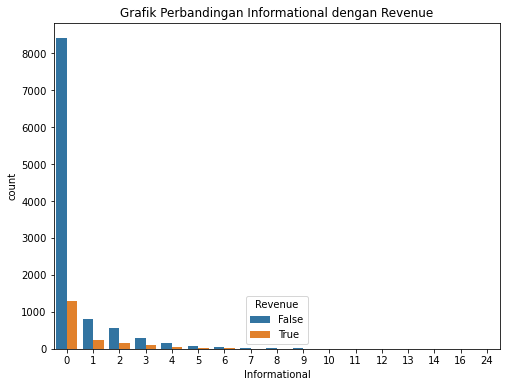

In [17]:
# Visualisasi data Analisis Multivariate antara Revenue dan Informational
plt.figure(figsize = (8,6))
sns.countplot(x = 'Informational', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan Informational dengan Revenue')
plt.show()

Insight : Nilai informatif pelanggan yang berpotensi terbanyak di kelas 0. Yang artinya pelanggan berpotensi kurang informatif memberikan data.

In [18]:
# Analisis Multivariate antara Revenue dan Informational_Duration
(pd.crosstab(index = df['Revenue'], columns = df['Informational_Duration'], normalize = 'all')*100).round(2)

Informational_Duration,0.000000,1.000000,1.500000,2.000000,2.500000,3.000000,3.500000,4.000000,5.000000,5.500000,...,1778.000000,1779.166667,1830.500000,1949.166667,2050.433333,2166.500000,2195.300000,2252.033333,2256.916667,2549.375000
Revenue,,,,,,,,,,,,,,,,,,,,,
False,69.60,0.02,0.01,0.06,0.01,0.11,0.01,0.11,0.11,0.02,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
True,10.89,0.00,0.00,0.03,0.00,0.02,0.00,0.02,0.03,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


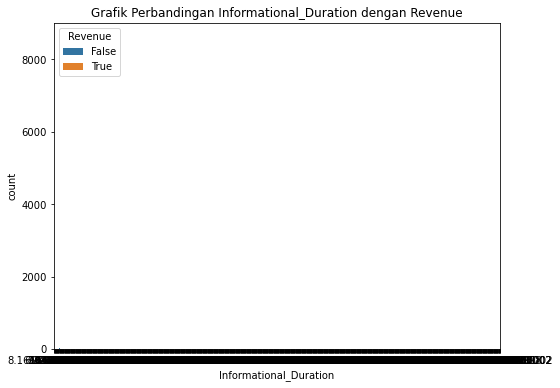

In [19]:
# Visualisasi data Analisis Multivariate antara Revenue dan Informational_Duration
plt.figure(figsize = (8,6))
sns.countplot(x = 'Informational_Duration', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan Informational_Duration dengan Revenue')
plt.show()

In [20]:
df[['Informational_Duration', 'Revenue']].groupby('Revenue').mean()

,Informational_Duration
Revenue,
False,30.236237
True,57.611427


Insight : Durasi informatif pelanggan yang berpotensi sebagai pendapatan bagi online shop adalah 58 detik.

In [21]:
# Analisis Multivariate antara Revenue dan ProductRelated
(pd.crosstab(index = df['Revenue'], columns = df['ProductRelated'], normalize = 'all')*100).round(2)

ProductRelated,0,1,2,3,4,5,6,7,8,9,...,449,470,486,501,517,518,534,584,686,705
Revenue,,,,,,,,,,,,,,,,,,,,,
False,0.26,4.94,3.61,3.51,3.13,2.94,3.02,2.89,2.66,2.30,...,0.01,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.01
True,0.05,0.11,0.16,0.20,0.15,0.16,0.19,0.28,0.34,0.28,...,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.00


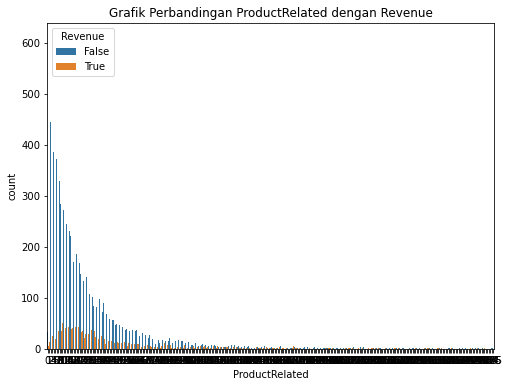

In [22]:
# Visualisasi data Analisis Multivariate antara Revenue dan ProductRelated
plt.figure(figsize = (8,6))
sns.countplot(x = 'ProductRelated', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan ProductRelated dengan Revenue')
plt.show()

In [23]:
df[['ProductRelated', 'Revenue']].groupby('Revenue').mean()

,ProductRelated
Revenue,
False,28.714642
True,48.210168


Insight : Pelanggan berpotensi rata-rata memberikan nilai 48 untuk produk yang mungkin mereka telah beli atau inginkan.

In [24]:
# Analisis Multivariate antara Revenue dan ProductRelated_Duration
(pd.crosstab(index = df['Revenue'], columns = df['ProductRelated_Duration'], normalize = 'all')*100).round(2)

ProductRelated_Duration,0.000000,0.500000,1.000000,2.333333,2.666667,3.000000,4.000000,5.000000,5.333333,6.000000,...,21672.244250,21857.046480,23050.104140,23342.082050,23888.810000,24844.156200,27009.859430,29970.465970,43171.233380,63973.522230
Revenue,,,,,,,,,,,,,,,,,,,,,
False,6.02,0.01,0.02,0.01,0.01,0.04,0.08,0.10,0.01,0.04,...,0.00,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01
True,0.11,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00


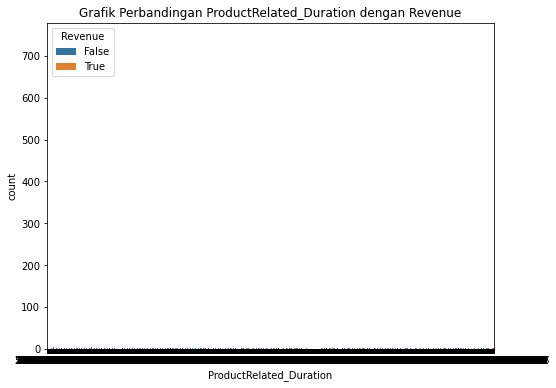

In [25]:
# Visualisasi data Analisis Multivariate antara Revenue dan ProductRelated_Duration
plt.figure(figsize = (8,6))
sns.countplot(x = 'ProductRelated_Duration', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan ProductRelated_Duration dengan Revenue')
plt.show()

In [26]:
df[['ProductRelated_Duration', 'Revenue']].groupby('Revenue').mean()

,ProductRelated_Duration
Revenue,
False,1069.987809
True,1876.209615


Insight : Rata-rata pelanggan berpotensi menghabiskan waktu selama 1876 detik dalam mengakses halaman terkait produk yang mereka beli atau inginkan

In [27]:
# Analisis Multivariate antara Revenue dan BounceRates
(pd.crosstab(index = df['Revenue'], columns = df['BounceRates'], normalize = 'all')*100).round(2)

BounceRates,0.000000,0.000027,0.000034,0.000038,0.000039,0.000071,0.000073,0.000075,0.000080,0.000081,...,0.160000,0.161905,0.164231,0.164286,0.166667,0.175000,0.176923,0.180000,0.183333,0.200000
Revenue,,,,,,,,,,,,,,,,,,,,,
False,36.35,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.00,...,0.02,0.01,0.01,0.01,0.03,0.01,0.01,0.04,0.01,5.65
True,8.40,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.01,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02


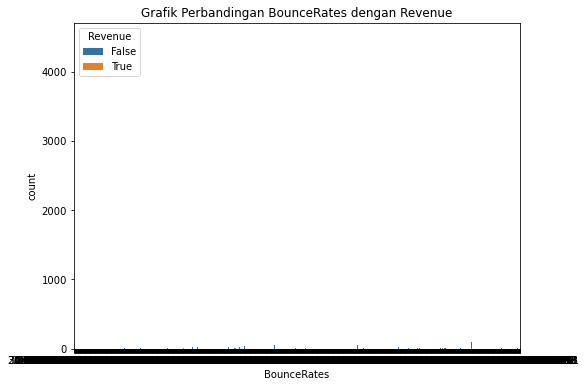

In [28]:
# Visualisasi data Analisis Multivariate antara Revenue dan BounceRates
plt.figure(figsize = (8,6))
sns.countplot(x = 'BounceRates', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan BounceRates dengan Revenue')
plt.show()

In [29]:
df[['BounceRates', 'Revenue']].groupby('Revenue').mean()

,BounceRates
Revenue,
False,0.025317
True,0.005117


Insight : Rasio pantulan dari halaman web yang diakses pelanggan berpotensi lebih besar dari pelanggan tidak berpotensi.

In [30]:
# Analisis Multivariate antara Revenue dan ExitRates
(pd.crosstab(index = df['Revenue'], columns = df['ExitRates'], normalize = 'all')*100).round(2)

ExitRates,0.000000,0.000176,0.000250,0.000262,0.000263,0.000292,0.000410,0.000446,0.000468,0.000481,...,0.175000,0.177778,0.180000,0.180342,0.181818,0.183333,0.186667,0.188889,0.192308,0.200000
Revenue,,,,,,,,,,,,,,,,,,,,,
False,0.34,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,...,0.05,0.04,0.02,0.01,0.01,0.02,0.03,0.02,0.01,5.73
True,0.28,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02


In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan ExitRates
plt.figure(figsize = (8,6))
sns.countplot(x = 'ExitRates', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan ExitRates dengan Revenue')
plt.show()

In [ ]:
df[['ExitRates', 'Revenue']].groupby('Revenue').mean()

Insight : tingkat keluarnya pelanggan berpotensi dari web online shop lebih kecil dari pelanggan tidak berpotensi

In [ ]:
# Analisis Multivariate antara Revenue dan PageValues
(pd.crosstab(index = df['Revenue'], columns = df['PageValues'], normalize = 'all')*100).round(2)

In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan PageValues
plt.figure(figsize = (8,6))
sns.countplot(x = 'PageValues', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan PageValues dengan Revenue')
plt.show()

In [ ]:
df[['PageValues', 'Revenue']].groupby('Revenue').mean()

Insight : Penilaian halaman dari web online shop oleh pelanggan berpotensi jauh lebih tinggi dari pelanggan tidak berpotensi 

In [ ]:
# Analisis Multivariate antara Revenue dan SpecialDay
(pd.crosstab(index = df['Revenue'], columns = df['SpecialDay'], normalize = 'all')*100).round(2)

In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan SpecialDay
plt.figure(figsize = (8,6))
sns.countplot(x = 'SpecialDay', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan SpecialDay dengan Revenue')
plt.show()

Insight : Hari spesial tidak mempengaruhi pelanggan berpotensi untuk berbelanja

In [ ]:
# Analisis Multivariate antara Revenue dan Month
(pd.crosstab(index = df['Revenue'], columns = df['Month'], normalize = 'all')*100).round(2)

In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan Month
plt.figure(figsize = (8,6))
sns.countplot(x = 'Month', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan Month dengan Revenue')
plt.show()

Insight : Pembeli berpotensi paling banyak melakukan aktivitas belanja online di bulan November

In [ ]:
# Analisis Multivariate antara Revenue dan OperatingSystems
(pd.crosstab(index = df['Revenue'], columns = df['OperatingSystems'], normalize = 'all')*100).round(2)

In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan OperatingSystems
plt.figure(figsize = (8,6))
sns.countplot(x = 'OperatingSystems', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan OperatingSystems dengan Revenue')
plt.show()

Insight : Pembeli berpotensi kebanyakan menggunakan operating system nomor 2

In [ ]:
# Analisis Multivariate antara Revenue dan Browser
(pd.crosstab(index = df['Revenue'], columns = df['Browser'], normalize = 'all')*100).round(2)

In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan Browser
plt.figure(figsize = (8,6))
sns.countplot(x = 'Browser', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan Browser dengan Revenue')
plt.show()

Insight : Pembeli berpotensi kebanyakan menggunakan browser nomor 2.

In [ ]:
# Analisis Multivariate antara Revenue dan Region
(pd.crosstab(index = df['Revenue'], columns = df['Region'], normalize = 'all')*100).round(2)

In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan Region
plt.figure(figsize = (8,6))
sns.countplot(x = 'Region', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan Region dengan Revenue')
plt.show()

Insight : Pelanggan berpotensi mayoritas berasal dari region 1

In [ ]:
# Analisis Multivariate antara Revenue dan TrafficType
(pd.crosstab(index = df['Revenue'], columns = df['TrafficType'], normalize = 'all')*100).round(2)

In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan TrafficType
plt.figure(figsize = (8,6))
sns.countplot(x = 'TrafficType', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan TrafficType dengan Revenue')
plt.show()

Insight : Mayoritas pelanggan berpotensi mengetahui online shop dari jenis traffic type nomor 2

In [ ]:
# Analisis Multivariate antara Revenue dan VisitorType
(pd.crosstab(index = df['Revenue'], columns = df['VisitorType'], normalize = 'all')*100).round(2)

In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan VisitorType
plt.figure(figsize = (8,6))
sns.countplot(x = 'VisitorType', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan VisitorType dengan Revenue')
plt.show()

Insight : Pelanggan berpotensi mayoritas merupakan pelanggan yang telah menggunakan web online shop sebelumnya dan kembali menggunakan web online shop lagi.

In [ ]:
# Analisis Multivariate antara Revenue dan Weekend
(pd.crosstab(index = df['Revenue'], columns = df['Weekend'], normalize = 'all')*100).round(2)

In [ ]:
# Visualisasi data Analisis Multivariate antara Revenue dan Weekend
plt.figure(figsize = (8,6))
sns.countplot(x = 'Weekend', data = df , hue = 'Revenue')
plt.title('Grafik Perbandingan Weekend dengan Revenue')
plt.show()

Insight : Mayoritas pembeli berpotensi mengakses laman web online shop saat weekend.

# Kesimpulan dan Saran serta simulasi Impact untuk perusahaan yang dapat anda berikan berdasarkan hasil EDA anda:

# Kesimpulan:
1. Dari hasil analisis dan insight yang telah dilakukan, permasalahan yang terjadi dalam online shop ini mengerucut pada banyaknya pelanggan yang tidak berpotensi menjadi pendapatan bagi online shop. Hal ini bisa dijadikan evaluasi ke depannya untuk melakukan improvement baik dalam hal tampilan web ataupun lainnya untuk meningkatkan persentase pelanggan menjadi pelanggan potensial untuk meningkatkan keuntungan dari online shop.
2. Hari Spesial tidak mempengaruhi niat pembeli untuk melakukan pembelanjaan online. Waktu yang berpengaruh untuk pelanggan melakukan pembelanjaan online adalah bulan September dan waktu pelanggan mengakses web kita adalah weekend.
3. Mayoritas pelanggan berpotensi berasal dari pelanggan yang sebelumnya sudah menggunakan online shop untuk berbelanja. Perlu dilakukan studi lebih lanjut mengenai alasan pelanggan tersebut meninggalkan online shop sebelumnya untuk dijadikan improvement.
4. Fokus EDA dalam hal ini berpusat pada data pelanggan berpotensi saja karena akan dilakukan machine learning pada data minoritas.

# Saran:
1. Mengadakan diskon di bulan September, khususnya weekend untuk meningkatkan daya beli pelanggan khususnya bagi pelanggan yang berpotensi (diprediksi menggunakan machine learning).
2. Membuat ML untuk mengetahui apakah pelanggan yang menggunakan web online shop kita merupakan pelanggan berpotensi agar keuntungan dari perusahaan lebih besar.
Kemungkinan naiknya persentase pelanggan berpotensi dengan menjalankan saran ini adalah 10% dari persentase saat ini. 